# Supervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of supervised learning model evaluation.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


import pylab as plt                                # plotting library
import seaborn as sns                              # plotting library
sns.set(style='white')                             # seaborn style
import dataanalysis_fun1 as mlg

## Regression Model Evaluation

In [10]:
thedata = pd.read_csv("../fetch_california_housing.csv")

In [41]:
thedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   MEDV        20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [11]:
thedata.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MEDV
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [39]:
mlg.na_absperc(thedata)

,abs_NA,perc_NA


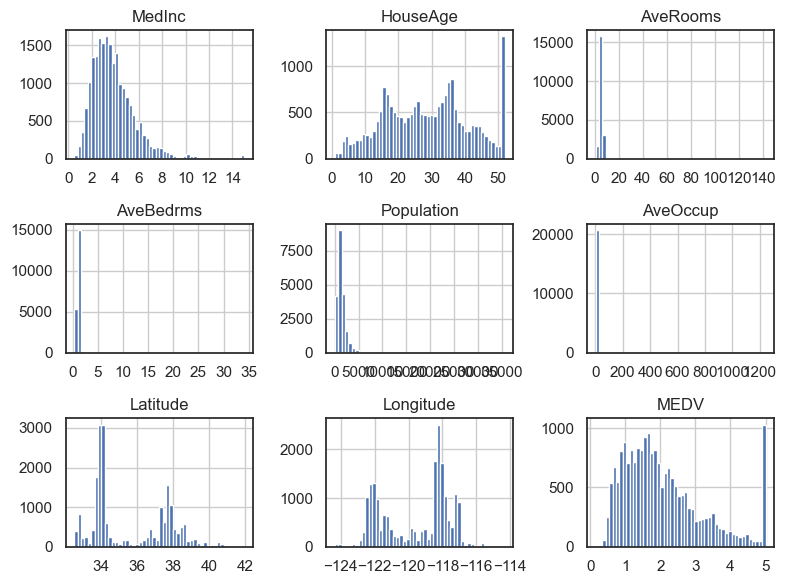

In [43]:
thedata.hist(figsize=(8, 6), bins=50)
plt.tight_layout()
plt.rcParams['xtick.labelsize'] = 5
plt.rcParams['xtick.labelsize'] = 5
#plt.rcParams['axes.titlesize'] = 5
plt.show()


In [18]:
list(thedata.columns)[:-1]

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [83]:
X = thedata[list(thedata.columns)[:-1]]
y = thedata['MEDV']

data = pd.concat([X, y], axis=1)

X.shape, y.shape

((20640, 8), (20640,))

## 1. Split this data set into training (80%) and testing (20%) sets.

The `MEDV` field represents the median value of owner-occupied homes (in $1000's) and is the target variable that we will want to predict.

In [32]:
from sklearn.model_selection import train_test_split as tts

X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, random_state=42)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((16512, 8), (16512,), (4128, 8), (4128,))

## 2. Train a `LinearRegression` model on this data set and generate predictions on both the training and the testing set.

In [1]:
from sklearn.linear_model import LinearRegression as LinReg

linreg = LinReg() #init the model

linreg.fit(X_train, y_train) # fit on the train

y_pred_train = linreg.predict(X_train)  # predict on the test
y_pred = linreg.predict(X_test)  # predict on the test


print("intercept", linreg.intercept_) # parameters extrated from the fitted model on the training set
display(dict(zip(X_train.columns, linreg.coef_)))

NameError: name 'X_train' is not defined

## 3. Calculate and print R-squared for both the training and the testing set.

In [71]:
from sklearn.metrics import r2_score as r2

r2(y_train, y_pred_train), r2(y_test, y_pred)

(0.6125511913966953, 0.5757877060324512)

## 4. Calculate and print mean squared error for both the training and the testing set.

In [72]:
from sklearn.metrics import mean_squared_error as mse  # error cuadratico medio

mse(y_train, y_pred_train, squared=False), mse(y_test, y_pred, squared=False)

(0.7196757085831573, 0.745581383012776)

## 5. Calculate and print mean absolute error for both the training and the testing set.

In [73]:
from sklearn.metrics import mean_absolute_error as mae

mae(y_train, y_pred_train), mae(y_test, y_pred)

(0.5286283596581934, 0.5332001304956564)

## Classification Model Evaluation

In [118]:
from sklearn.datasets import load_iris

data = load_iris()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.DataFrame(data["target"], columns=["class"])
y = y.iloc[:, 0]

data = pd.concat([X, y], axis=1)

## 6. Split this data set into training (80%) and testing (20%) sets.

The `class` field represents the type of flower and is the target variable that we will want to predict.

In [119]:
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, random_state=42)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((120, 4), (120,), (30, 4), (30,))

## 7. Train a `LogisticRegression` model on this data set and generate predictions on both the training and the testing set.

In [128]:
y_train.unique(), y_test.unique() 

(array([0, 1, 2]), array([1, 0, 2]))

In [134]:
from sklearn.linear_model import LogisticRegression as LogReg

logreg = LogReg(max_iter=1000) # init the model

logreg.fit(X_train, y_train) # fit the model with training data

y_pred = logreg.predict(X_test) #predict on the test data
y_pred_train = logreg.predict(X_train) #predict on the training data

In [137]:
y_prob = logreg.predict_proba(X_test) #predict on the test data
y_prob[:5]

array([[3.78383068e-03, 8.27227259e-01, 1.68988911e-01],
       [9.46721573e-01, 5.32782267e-02, 1.99955522e-07],
       [8.72146385e-09, 1.55662208e-03, 9.98443369e-01],
       [6.43295248e-03, 7.92120766e-01, 2.01446281e-01],
       [1.44091587e-03, 7.74298970e-01, 2.24260114e-01]])

## 8. Calculate and print the accuracy score for both the training and the testing set.

In [159]:
logreg.score(X_train, y_train), logreg.score(X_test, y_test)  # accuracy, acierto

from sklearn.metrics import accuracy_score as acc
acc(y_train, y_pred_train), acc(y_test, y_pred)

(0.975, 1.0)

## 9. Calculate and print the balanced accuracy score for both the training and the testing set.

In [160]:
from sklearn.metrics import balanced_accuracy_score as bal_acc

bal_acc(y_train, y_pred_train), bal_acc(y_test, y_pred)

(0.975609756097561, 1.0)

## 10. Calculate and print the precision score for both the training and the testing set.

#### help(f1)  
    average : {'micro', 'macro', 'samples','weighted', 'binary'} or None,             default='binary'
        This parameter is required for multiclass/multilabel targets.
        If ``None``, the scores for each class are returned. Otherwise, this
        determines the type of averaging performed on the data:

In [147]:
from sklearn.metrics import precision_score as prec

prec(y_train, y_pred_train, average=None), prec(y_test, y_pred, average=None)

(array([1.        , 1.        , 0.92857143]), array([1., 1., 1.]))

## 11. Calculate and print the recall score for both the training and the testing set.

In [163]:
from sklearn.metrics import recall_score as rec

rec(y_train, y_pred_train, average=None), rec(y_test, y_pred, average=None)

(array([1.        , 0.92682927, 1.        ]), array([1., 1., 1.]))

## 12. Calculate and print the F1 score for both the training and the testing set.

In [148]:
from sklearn.metrics import f1_score as f1

f1(y_train, y_pred_train,  average=None), f1(y_test, y_pred,  average=None)

(array([1.        , 0.96202532, 0.96296296]), array([1., 1., 1.]))

## 13. Generate confusion matrices for both the training and the testing set.

In [164]:
from sklearn.metrics import confusion_matrix as cm

cm(y_train, y_pred_train)

array([[40,  0,  0],
       [ 0, 38,  3],
       [ 0,  0, 39]])

In [165]:
cm(y_test, y_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

## Bonus: For each of the data sets in this lab, try training with some of the other models you have learned about, recalculate the evaluation metrics, and compare to determine which models perform best on each data set.

## I will check whether `feature scaling` the cali housing data improves the predictions (linear reg)

In [4]:
thedata = pd.read_csv("../fetch_california_housing.csv")

In [5]:
X = thedata[list(thedata.columns)[:-1]]
y = thedata['MEDV']

data = pd.concat([X, y], axis=1)

X.shape, y.shape

((20640, 8), (20640,))

#### SPLIT THE DATA

In [6]:
from sklearn.model_selection import train_test_split as tts

X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, random_state=42)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((16512, 8), (16512,), (4128, 8), (4128,))

#### FEATURE SCALING

In [7]:
from sklearn.preprocessing import RobustScaler

transformer = RobustScaler().fit(X_train) #fit the scaler on training data
X_train_scaled=transformer.transform(X_train) # scale the training data
X_test_scaled=transformer.transform(X_test) # scale the test data


# concat again the tables to plot the histograms

Xdata_scaled = pd.concat([pd.DataFrame(X_train_scaled),
                          pd.DataFrame(X_test_scaled)], axis=0)

Xdata_scaled.columns=list(thedata.columns)[:-1]
Xdata_scaled

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,-0.129709,0.210526,-0.135624,-0.456789,1.209178,1.027459,-0.408971,0.389474
1,0.120872,1.052632,-0.473796,-0.088238,0.156884,-1.267790,-0.129288,0.092105
2,0.276686,-1.315789,0.254794,-0.683787,-0.268943,-0.110462,0.105541,-0.518421
3,-0.726634,0.368421,-0.766358,-0.164991,0.267876,1.382901,-0.414248,0.368421
4,0.003807,0.736842,0.641740,0.904998,-0.312700,-0.607659,0.664908,-0.339474
...,...,...,...,...,...,...,...,...
4123,0.480042,-0.684211,1.097799,0.182077,0.196371,0.201713,-0.237467,0.339474
4124,-0.371271,-0.052632,0.556899,2.210700,0.515475,-0.560166,0.290237,-0.610526
4125,2.576055,-0.210526,1.244142,-1.088049,0.446105,-0.031422,0.804749,-0.931579
4126,-0.344803,0.368421,0.033037,-0.705064,0.064034,-0.268599,0.662269,-0.328947


THE DATA DISTRIBUTION IS THE SAME BUT THE SCALE HAS CHANGED

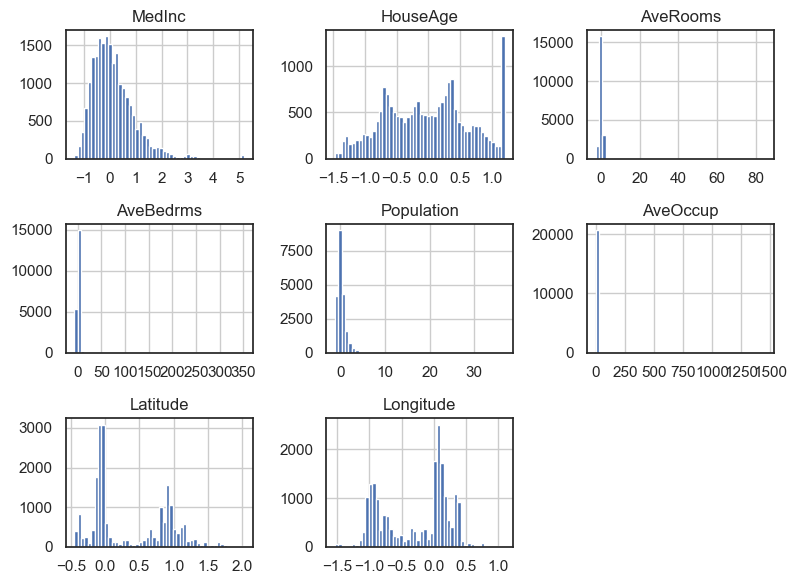

In [8]:
Xdata_scaled.hist(figsize=(8, 6), bins=50)
plt.tight_layout()
plt.rcParams['xtick.labelsize'] = 5
plt.rcParams['xtick.labelsize'] = 5
#plt.rcParams['axes.titlesize'] = 5
plt.show()

In [9]:
from sklearn.linear_model import LinearRegression as LinReg

linreg = LinReg() #init the model

linreg.fit(X_train_scaled, y_train) # fit on the train

y_pred_train = linreg.predict(X_train_scaled)  # predict on the test
y_pred = linreg.predict(X_test_scaled)  # predict on the test


print("intercept", linreg.intercept_) # parameters extrated from the fitted model on the training set
display(dict(zip(X_train.columns, linreg.coef_)))

intercept 2.0300236007230605


{'MedInc': 0.9899899713046635,
 'HouseAge': 0.1847608928402003,
 'AveRooms': -0.19842503814591228,
 'AveBedrms': 0.07349028010934491,
 'Population': -0.0019017544835941164,
 'AveOccup': -0.003001606146641869,
 'Latitude': -1.5910135241698744,
 'Longitude': -1.6480906468631482}

### the feature scaling did not improved the predictions at all.
However, the model changed the Beta's, what gives as a better estimation of the relative importance of each parameter (coff)

**`StandardScaler` and `RobustScaler`** techniques used for **feature (column) scaling** in machine learning. 

* **StandardScaler**: It assumes that the data is normally distributed and is **sensitive to outliers** (scales based on mean)
* **RobustScaler**: Is **robust to outliers** (scales based on median and interquartile range (IQR))

**`Normalizer`** (available in from `sklearn.preprocessing` too) used for **row-wise normalization**

It Scales each sample (row) independently to have a unit norm (Euclidean norm of 1).
Does not center the data. Useful for algorithms that require normalized input vectors, like clustering algorithms or neural networks.

* **L1 normalization (Least Absolute Deviations)** scales each feature by dividing it by the sum of its absolute values.
* **L2 normalization (Least Squares)** scales each feature by dividing it by the square root of the sum of its squares.



#### USE OR NOT USE ???

In most cases, you **wouldn't use Normalizer directly for linear regression** because linear regression algorithms often **don't require normalized input** features. The regression coefficients (weights) are estimated using the least squares method, which inherently handles feature scales.

If you're using **regularization** techniques like **Ridge or Lasso** regression, which **penalize large coefficients**. In such cases, using **StandardScaler or RobustScaler might be more appropriate**.

In [10]:
from sklearn.metrics import r2_score as r2

r2(y_train, y_pred_train), r2(y_test, y_pred)

# FORMER R2: (0.6125511913966953, 0.5757877060324512)

(0.6125511913966952, 0.575787706032451)

In [11]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((16512, 8), (16512,), (4128, 8), (4128,))

In [12]:
from sklearn.preprocessing import StandardScaler, Normalizer

# standardization
transformer = StandardScaler().fit(X_train) #fit the scaler on training data
X_train_scaled=transformer.transform(X_train) # scale the training data
X_test_scaled=transformer.transform(X_test) # scale the test data
#

# Unit Vector Normalization
scaler_unit = Normalizer(norm='l2')  # 'l1' or 'l2' for L1 or L2 normalization
X_train_scaled = scaler_unit.fit_transform(X_train_scaled)
X_test_scaled = scaler_unit.fit_transform(X_test_scaled)


#
Xdata_scaled = pd.concat([pd.DataFrame(X_train_scaled),
                          pd.DataFrame(X_test_scaled)], axis=0)

Xdata_scaled.columns=list(thedata.columns)[:-1]
Xdata_scaled

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,-0.155528,0.166158,-0.083399,-0.099347,0.366310,0.024496,-0.654549,0.606762
1,-0.017716,0.799771,-0.199105,-0.063527,-0.048883,-0.058007,-0.433316,0.350510
2,0.068035,-0.918114,0.041477,-0.121088,-0.211493,-0.015177,-0.216349,-0.210451
3,-0.446484,0.257287,-0.263196,-0.063673,-0.003261,0.033998,-0.606287,0.540721
4,-0.121303,0.807802,0.246871,0.061274,-0.343686,-0.048688,0.376371,-0.076784
...,...,...,...,...,...,...,...,...
4123,0.187489,-0.493201,0.323569,-0.034495,-0.032713,-0.004599,-0.526771,0.580633
4124,-0.594653,-0.047357,0.286316,0.362488,0.192895,-0.064106,-0.130021,-0.610367
4125,0.854584,-0.087108,0.229696,-0.104992,0.042422,-0.008053,0.237341,-0.374326
4126,-0.557245,0.568010,-0.059308,-0.253863,-0.169874,-0.042518,0.510737,-0.085807


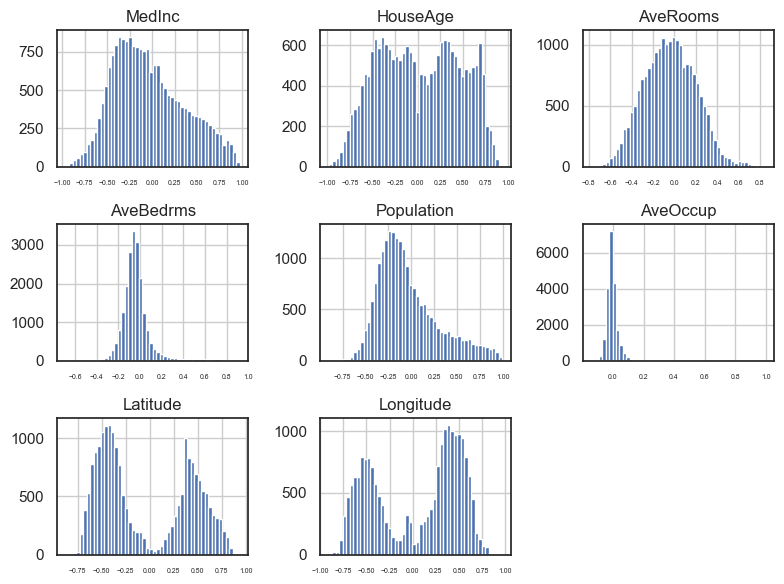

In [226]:
Xdata_scaled.hist(figsize=(8, 6), bins=50)
plt.tight_layout()
plt.rcParams['xtick.labelsize'] = 5
plt.rcParams['xtick.labelsize'] = 5
#plt.rcParams['axes.titlesize'] = 5
plt.show()

In [13]:
from sklearn.linear_model import LinearRegression as LinReg

linreg = LinReg() #init the model

linreg.fit(X_train_scaled, y_train) # fit on the train

y_pred_train = linreg.predict(X_train_scaled)  # predict on the test
y_pred = linreg.predict(X_test_scaled)  # predict on the test


print("intercept", linreg.intercept_) # parameters extrated from the fitted model on the training set
display(dict(zip(X_train.columns, linreg.coef_)))

intercept 2.104575124485332


{'MedInc': 2.2046115011484506,
 'HouseAge': 0.3343483320953017,
 'AveRooms': -0.9556470678309925,
 'AveBedrms': 1.1350858215637731,
 'Population': 0.055672280643951945,
 'AveOccup': -4.285850592694984,
 'Latitude': -1.4142878360106754,
 'Longitude': -1.35643142138913}

#### IT IMPROVED THE R2 ON TEST A LITTLE BIT

In [14]:
from sklearn.metrics import r2_score as r2

r2(y_train, y_pred_train), r2(y_test, y_pred)

# FORMER R2: (0.6125511913966953, 0.5757877060324512)

(0.6089828835334312, 0.5935789816306617)

In [19]:
thedata

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MEDV
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


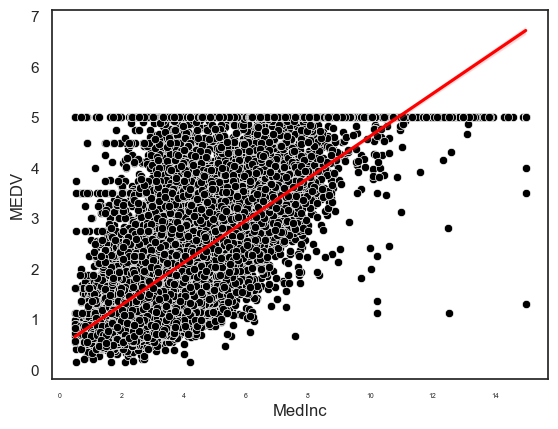

In [22]:
sns.scatterplot(data=thedata, x="MedInc", y="MEDV", color='black')
sns.regplot(data=thedata, x="MedInc", y="MEDV", scatter=False, color='red');  # Regression line
